# Pattern Recognition: Default of Credit Card Clients

## Introduction

When clients are unable to pay their credit card debts, banks incur financial losses. 
Predicting whether a client will default on their obligations can be done with a binary classification. 
This report aims to describe the process undertaken in the simple classifiers that determine if a client is likely to repay their credit card debt or not.

# Getting Started

In this project it was used Python frameworks to create classifier and feature reduction models, perform data transformation, and generate visual plots. Specifically, we relied on scikit-learn for building classifier models and conducting feature selection. Pandas was employed for data manipulation tasks such as cleaning and preprocessing, while matplotlib and seaborn were used for visualization purposes. 

## Requirements

In [ ]:
%pip install pandas numpy matplotlib seaborn 
!pip install scikit-learn
%pip install imbalanced-learn

## Imports

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.stats import kstest, kruskal

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Data

In [ ]:
INPUT_PATH = '../data/credit_card_clients.csv'
data = pd.read_csv(INPUT_PATH)

data.rename(columns={'default payment next month': 'target'}, inplace=True)
data.drop(["ID"], axis=1, inplace=True)

display("Total rows: " + str(len(data)))
display("Columns: " + ", ".join(list(map(str, data.columns))))
display(data.head(10))

In [7]:
y = data['target'].copy()
X = data.copy()
X.drop(['target'], axis=1, inplace=True)


The dataset used in this study has **30000 observations**  that represent the diferents clients. Each observation has **24 features**: 

The first group is informations about the client:
- ID: id of client
- LIMIT_BAL: the amount of credit
- SEX: the gender (1=male, 2=female)
- EDUCATION: the level of education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE:  (1=married, 2=single, 3=others)
- AGE: the age

The second group is the history of past monthly payment (tells about delay of the past payments):
- PAY_0: the repayment status in September 2005
- PAY_2: the repayment status in August 2005
- PAY_3: the repayment status in July 2005
- PAY_4: the repayment status in June 2005
- PAY_5: the repayment status in May 2005
- PAY_6: the repayment status in April 2005

The measurement scale for the repayment status is: 
- -1: pay duly; 
- 1: payment delay for one month; 
- 2: payment delay for two months; 
- ...; 
- 8: payment delay for eight months; 
- 9: payment delay for nine months and above.

The fird group is the amount of bill statement:
- BILL_AMT1: Amount of bill statement in September, 2005
- BILL_AMT2: Amount of bill statement in August, 2005
- BILL_AMT3: Amount of bill statement in July, 2005
- BILL_AMT4: Amount of bill statement in June, 2005
- BILL_AMT5: Amount of bill statement in May, 2005
- BILL_AMT6: Amount of bill statement in April, 2005

The forth group consider the amount of previous payment:
- PAY_AMT1: Amount of previous payment in September, 2005
- PAY_AMT2: Amount of previous payment in August, 2005
- PAY_AMT3: Amount of previous payment in July, 2005
- PAY_AMT4: Amount of previous payment in June, 2005
- PAY_AMT5: Amount of previous payment in May, 2005
- PAY_AMT6: Amount of previous payment in April, 2005

Just for a question of simplicity the last feature labled by default **payment next month**, it was renamed to **target**.

The measurement scale for class is: 
- (1=non-defaulters, 0=defaulters)

### Data Filtering
Before proceeding with any data visualization or processing, it's essential to check for missing values within the dataset. If any missing values are detected, the data will be filtered accordingly.

It's evident that all cells are fully completed, indicating the absence of any missing values. Therefore, there is no need for filtering or data manipulation due to missing values.

In [ ]:
data.isna().sum().T

### Data Normalization

Standardization of a dataset is a common requirement for many machine learning tasks.
With the data normalization concern, the `StandardScaler` method was used. It standardize features by removing the mean and caling to unit variance.

The standerd score of a sample `x` is calculates as:
$$ z = \frac{x-\mu}{\sigma}$$
Where:
- x is the original value of the sample.
- μ is the mean of the feature across the dataset.
- σ is the standard deviation of the feature across the dataset.

In [11]:
scaler =  StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Data Visualization

Understanding the distribution of data is crucial for selecting appropriate models and techniques to apply to the data.

First thing first, let us see the class distribuition. It is evident that there is an imbalance between the classes. Ideally, a perfect balance would follow a 50/50 distribution between classes. However, in our dataset, we observe a distribution of 22% for class 1 and 78% for class 0.

This imbalance in class distribution may impact the performance of certain machine learning algorithms, particularly those sensitive to class imbalance. Therefore, it's important to address this issue during model training and evaluation to ensure robust and reliable results.

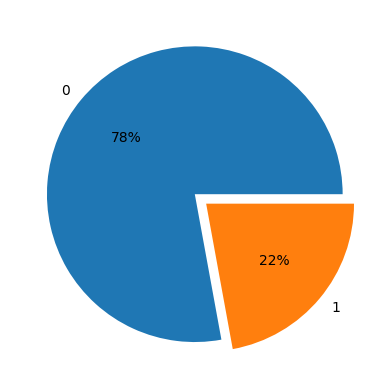

'Perc. of class 1: 22.12 %'

In [14]:
plt.figure()

values = data['target'].value_counts()
keys = [0, 1]
explode = [0, 0.1]
plt.pie(values, labels=keys, explode=explode, autopct='%.0f%%')

plt.show()

display("Perc. of class 1: " + str(data['target'].sum() / data.shape[0] * 100) + " %")

The Kolmogorov-Smirnov statistic test is commonly used to compare data to a normal standard distribution. 
It is possible to say the K-S test may not be the correct test to apply due the results obtained.

In [26]:
ks_statistic = []
p_value = []
for feature in X.columns:
    ks, p= kstest(X[feature], 'norm')
    ks_statistic.append(ks)
    p_value.append(p)
print(X.columns)
print(ks_statistic)
jprint(p_value)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
[0.115112967654111, 0.394809434023094, 0.24725638863894117, 0.34760759312828166, 0.09440123896362645, 0.26680506063616516, 0.30758299259816724, 0.3043451619381855, 0.30814591279120274, 0.30820343204121703, 0.2974476947239121, 0.2366617340063037, 0.23686533499280138, 0.23996273359903708, 0.24081271192600948, 0.2434495083469547, 0.24576619130695798, 0.36619741408756495, 0.39859343225016985, 0.38330911635361176, 0.3790173640730474, 0.3767088296491745, 0.38461506904495213]
[0.0, 0.0, 0.0, 0.0, 3.9620271526220444e-233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Since the dataset does not follow a normal distribution, it's appropriate to explore non-parametric statistical tests.

By applying the Kruskal-Wallis test to our dataset, we can rank the features based on their importance. Features with higher test statistics and lower p-values indicate greater significance in differentiating between classes.

In [76]:
rank = [ (feature, kruskal(X[feature], y)[0]) for feature in X.columns ]
rank.sort(key=lambda x: x[1], reverse=True)

print("K-W Feature ranking:\n" + "\n".join(f"{feature:<10} | {h_stat:.2f}" for feature, h_stat in rank))

K-W Feature ranking:
PAY_AMT6   | 23702.21
PAY_AMT3   | 21591.27
PAY_AMT2   | 20982.74
PAY_AMT4   | 19374.24
PAY_AMT1   | 19270.67
PAY_AMT5   | 19210.45
BILL_AMT6  | 10893.89
BILL_AMT5  | 10809.71
BILL_AMT1  | 10608.73
BILL_AMT4  | 10216.06
BILL_AMT2  | 9874.18
BILL_AMT3  | 9671.52
LIMIT_BAL  | 3102.06
AGE        | 2694.41
PAY_0      | 1331.28
MARRIAGE   | 1108.18
PAY_2      | 615.24
PAY_3      | 482.09
PAY_4      | 382.74
EDUCATION  | 365.70
PAY_5      | 297.08
SEX        | 176.91
PAY_6      | 126.67


By plotting the rankings of features against their importance scores we can observe the point at which the curve stabilizes or flattens out. 
This point suggests that additional features beyond this point may not contribute significantly to the classification.
Following this thought the last eleven features in the previous features leaderboard can be deleted.

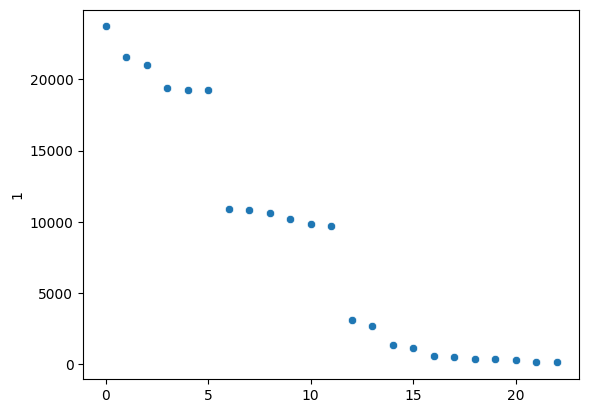

In [64]:
rank = pd.DataFrame(rank)
plt.figure()
sb.scatterplot(rank[1])
plt.show()

Examining the follow plots can reveal important patterns, such as whether certain features exhibit distinct distributions for different classes, indicating their potential importance for classification. Additionally, these plots can highlight any overlap or separation between classes, which impacts the feasibility and accuracy of classification algorithms.

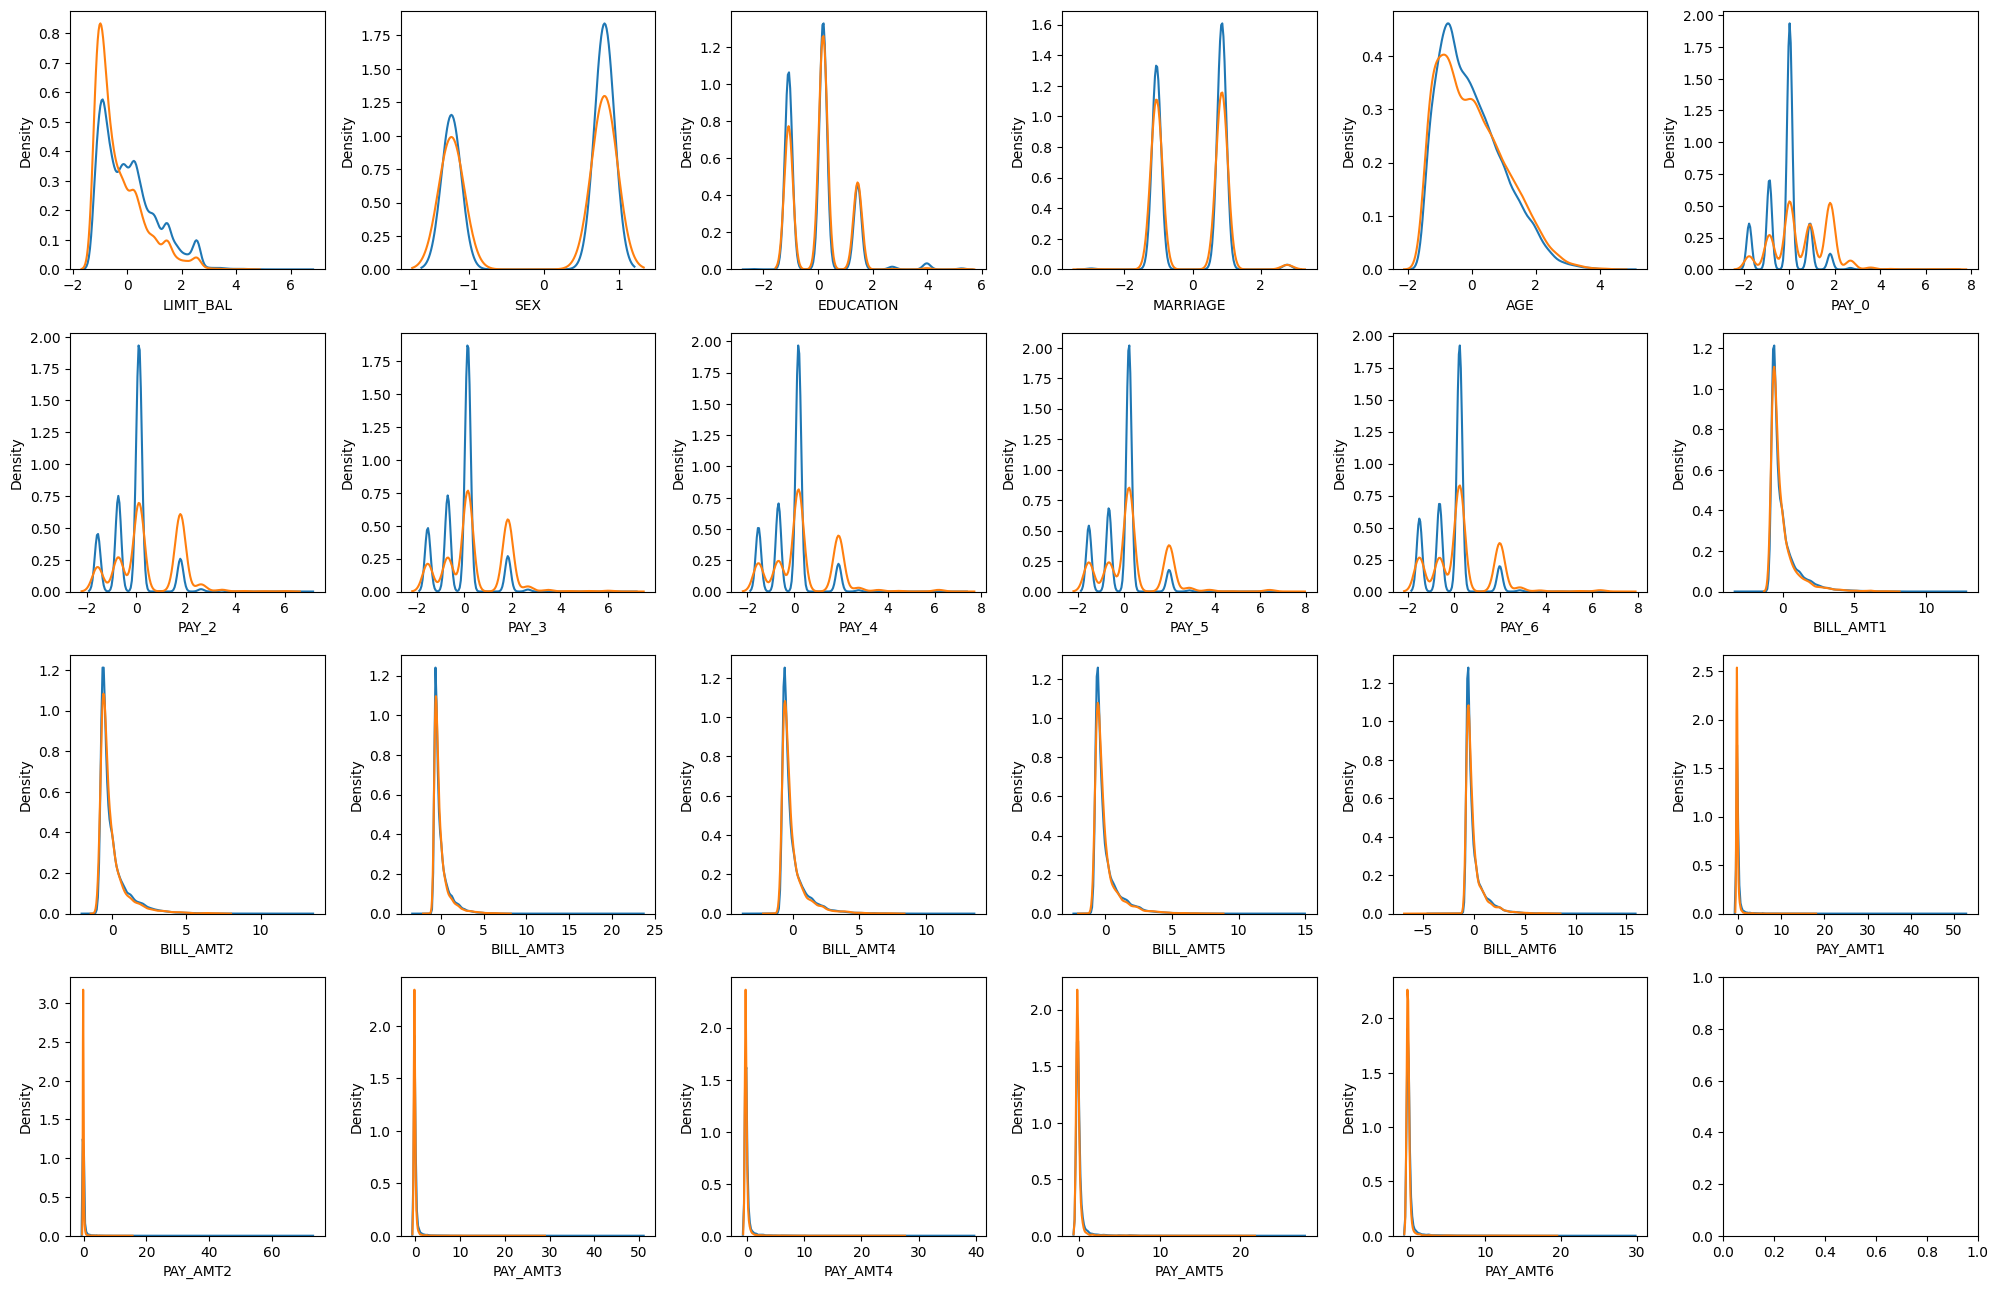

In [27]:
fig, axes = plt.subplots(4, 6, figsize=(20, 13))

for i in range(len(X.columns)):
    sb.kdeplot(ax=axes[i//6, i%6], data=X[y == 0][X.columns[i]])
    sb.kdeplot(ax=axes[i//6, i%6], data=X[y == 1][X.columns[i]])

plt.tight_layout()
plt.show()

The last tool I bring is the correlation matrix. It is a powerful technique that allows us to understand how the data is correlated by feature.

The most clear cells say there is a strong correlation.
If you carefully analise the plot, you can see that certain features such as the BILL_AMT variables are often highly correlated, indicating redundancy in the information they provide.

Moreover, examining the correlation between the target and the PAY feature, which represents payment status, is insightful. A strong correlation between the PAY feature and the target variable suggests that payment behavior is a significant predictor of credit card default. For instance, if a client frequently delays payments (PAY feature), it may indicate a higher likelihood of defaulting on credit card obligations and vice-versa.

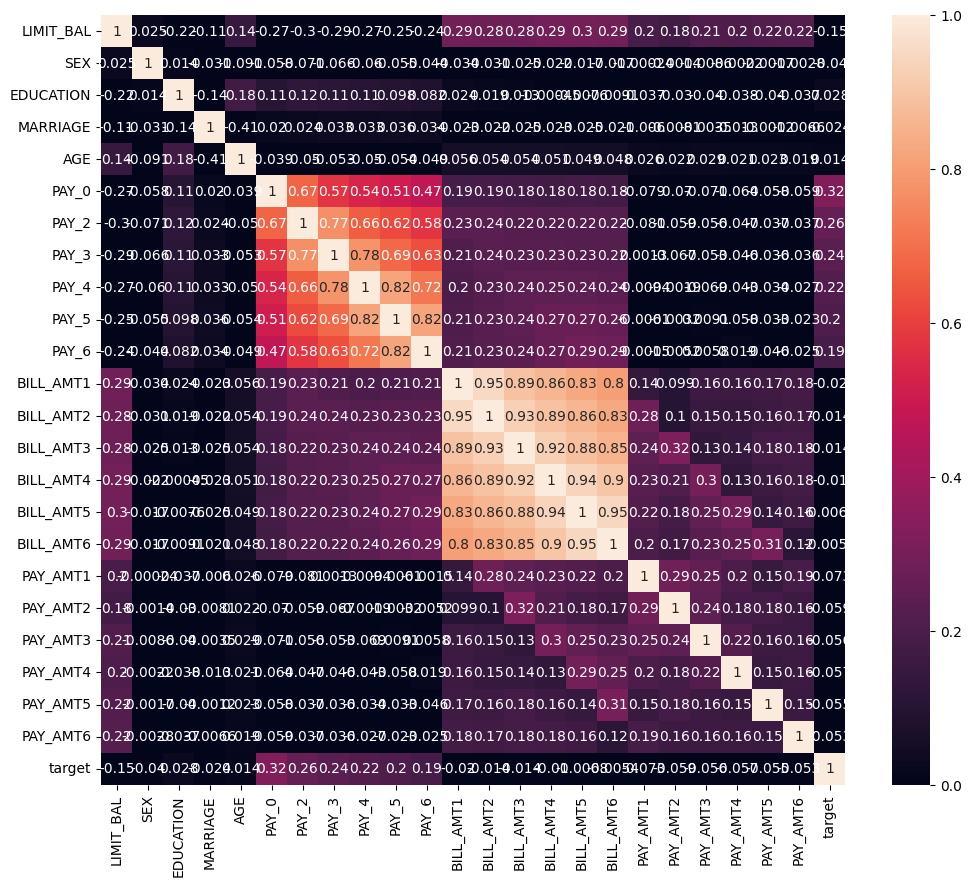

In [77]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(corr, annot=True, vmin=0.0)
plt.show()